---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

[Text(0.5, 0, 'called minutes per month'), Text(0, 0.5, 'SEK per month')]

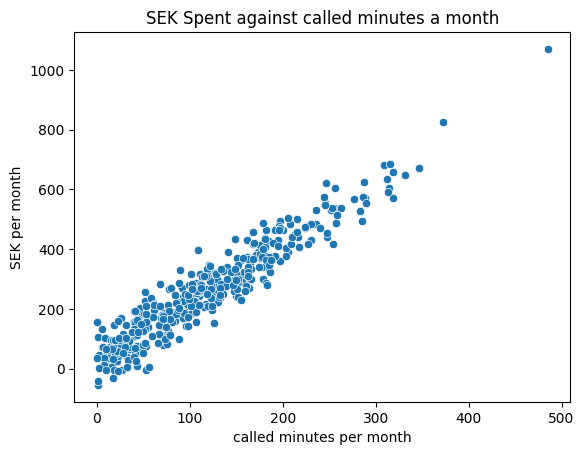

In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


# question a)

sample  = 400 # Setting a sample of 400
np.random.seed(42) # This enables the random sample to remain the same sample throughout the process

X =np.abs(np.random.normal(loc=100, scale=100,size=sample)) 
# Creating the X variable. using a normal distribution mu= 100 sigma = 100, using the abs to ensure there is no minus numbers in the variable.

e = np.random.normal(loc=0,scale=50, size=sample) # Variable e created 400 noise samples 
y = 2*X + 25 + e # Creating the y variable


ax = sns.scatterplot(x=X, y=y) # creating a scatter plot to visualize the data.
ax.set(title="SEK Spent against called minutes a month") # adding a title to the graph!
ax.set(xlabel="called minutes per month", ylabel="SEK per month")


In [48]:
# question b)
y = np.abs(y) # fixing so that there is no minus numbers in the sample

df_phone_sub = pd.DataFrame() # creating a data frame.
df_phone_sub["called minutes per month"] = pd.Series(X) #adding column to data frame from the X variable 
df_phone_sub["SEK per month"] = pd.Series(y) # adding column to the data frame from the y variable

df_phone_sub = df_phone_sub.loc[df_phone_sub["called minutes per month"] < 300]

df_phone_sub

,called minutes per month,SEK per month
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
395,53.082435,183.822512
396,71.313453,165.649148
397,235.387237,529.849510
398,88.546015,203.507950


[Text(0.5, 1.0, 'SEK Spent against called minutes a month')]

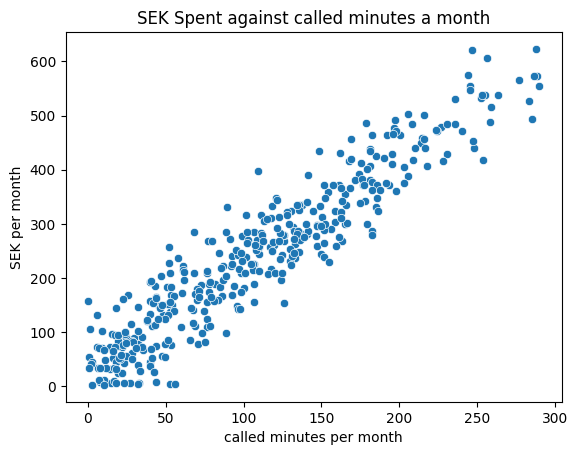

In [51]:
ax = sns.scatterplot(data=df_phone_sub, x="called minutes per month", y="SEK per month")
ax.set(title="SEK Spent against called minutes a month") # adding a title to the graph!